In [1]:
from pathlib import Path

# Automatically get the base path of your project
base_path = Path.cwd().parents[0]  # adjust .parents[0] if needed
print("Base path of the project:", base_path)

Base path of the project: c:\Users\Yusuf\OneDrive\LST\Derde_jaar\Y3Q4\Metaproteomics_with_db


In [ ]:
# This code is more robust and will work regardless of the current working directory.
# Make sure that base_path is defined correctly.
# Ensure that the required packages are installed from the requirements.txt file
!pip3 install -r "{base_path}/requirements.txt"

### Step 1-2: Load De Novo Peptides and Prepare for DIAMOND Alignment

In this pipeline, we aim to identify microbial taxa by aligning de novo peptide sequences to the UniRef100 protein database using **DIAMOND** (a fast sequence aligner). Unlike the `pept2lca` pipeline that relies on peptide-level taxonomy (via UniPept), this approach uses **protein-level matches** and maps those proteins back to organisms using UniProt annotations.

These first two blocks perform the following:
1. **Define the path to the DIAMOND database** built from the UniRef100 FASTA.
2. **Load and filter** the de novo peptide predictions, retaining only high-confidence sequences (ALC > 70%).

These peptides will later be aligned to the UniRef100 database using DIAMOND to obtain the best-matching protein accession IDs for taxonomic annotation.


In [ ]:
# Define the path to the DIAMOND database (must end in .dmnd and be created beforehand)
# Example: downloaded and built from UniRef100 using diamond makedb
diamond_db = r"E:\Uniref100.dmnd"  # Update this path based on where your .dmnd file is located

In [ ]:
# Import pandas for data handling
import pandas as pd

# === Step 1: Load the de novo peptide dataset ===

# Define the path to the CSV file containing de novo peptide predictions
# Replace 'base_path' with your project-specific base path if necessary
de_novo_data_path = base_path / "de_novo_data" / "de_novo_garmerwolde.csv"

# Load the CSV into a pandas DataFrame
df = pd.read_csv(de_novo_data_path)

# Display the full shape of the dataset (rows, columns)
print(f"Original dataset shape: {df.shape}")

# Preview a subset of rows for inspection (use iloc with zero-based indexing)
print("Original Data (rows 24219-24227):")
display(df.iloc[24218:24228])

# === Step 2: Filter peptides based on ALC (Average Local Confidence) score ===

# Retain only high-confidence peptide sequences with ALC > 70%
filtered_df = df[df["ALC (%)"] > 70]

# Display the filtered dataset shape
print(f"Filtered dataset shape: {filtered_df.shape}")

# Preview the same range of rows after filtering (if still present)
print("Filtered Data (rows 24219-24227):")
display(filtered_df.iloc[24218:24228])  # Only shows output if those rows survived filtering

# Display how many peptides were removed in the filtering step
print(f"Number of peptides filtered out: {df.shape[0] - filtered_df.shape[0]}")

Original dataset shape: (189185, 20)
Original Data (rows 24219-24227):


,Fraction,Source File,Feature,Peptide,Scan,Tag Length,Denovo Score,ALC (%),length,m/z,z,RT,Predict RT,Area,Mass,ppm,PTM,local confidence (%),tag (>=0%),mode
24218,2,MP_RZ07032023_GW_flat_180min_DDA02.raw,-,KYAYFPVWVNDDKMSLPLR,F2:51275,19,76,68,19,781.3988,3,143.42,142.11,0.0,2341.1929,-7.8,NaN,45 39 41 35 33 43 89 98 98 94 95 96 94 90 83 4...,KYAYFPVWVNDDKMSLPLR,HCD
24219,1,MP_RZ07032023_GW_flat_180min_DDA01.raw,F1:35083,MWALDLR,F1:38190,7,76,78,7,452.7394,2,113.16,129.39,34600.0,903.4636,0.6,NaN,56 71 84 79 79 85 90,MWALDLR,HCD
24220,2,MP_RZ07032023_GW_flat_180min_DDA02.raw,F2:98838,LAAALTPAPVLAK,F2:33083,13,76,70,13,618.3896,2,100.95,110.95,13200000.0,1234.7649,-0.2,NaN,48 50 80 99 100 100 99 96 33 31 48 45 82,LAAALTPAPVLAK,HCD
24221,2,MP_RZ07032023_GW_flat_180min_DDA02.raw,F2:83383,APMSGLQNWK,F2:29687,10,76,70,10,566.2845,2,92.40,83.12,215000.0,1130.5542,0.3,NaN,96 94 85 92 82 41 28 21 69 92,APMSGLQNWK,HCD
24222,2,MP_RZ07032023_GW_flat_180min_DDA02.raw,F2:107262,SLTAPSGVPGM(+15.99)FK,F2:26077,13,76,67,13,654.3237,2,83.51,83.66,75700.0,1306.6592,-20.1,Oxidation (M),37 46 79 93 95 96 88 84 23 17 26 89 97,SLTAPSGVPGM(+15.99)FK,HCD
24223,2,MP_RZ07032023_GW_flat_180min_DDA02.raw,F2:139236,EVQAWSWWWM(+15.99)TRRAAMDVPGR,F2:49588,21,76,68,21,879.0955,3,139.45,141.68,822000.0,2634.2371,10.4,Oxidation (M),37 25 33 44 44 41 81 84 90 88 90 40 52 96 95 8...,EVQAWSWWWM(+15.99)TRRAAMDVPGR,HCD
24224,2,MP_RZ07032023_GW_flat_180min_DDA02.raw,F2:3957,MGFYGGR,F2:13573,7,76,68,7,394.1815,2,50.45,47.75,376000.0,786.3483,0.3,NaN,17 29 90 86 80 83 90,MGFYGGR,HCD
24225,1,MP_RZ07032023_GW_flat_180min_DDA01.raw,F1:103943,TLGALDGTN(+.98)MNR,F1:23486,12,76,71,12,632.3035,2,78.32,67.85,3660000.0,1262.5925,0.0,Deamidation (NQ),21 21 26 76 99 98 90 88 70 82 91 93,TLGALDGTN(+.98)MNR,HCD
24226,1,MP_RZ07032023_GW_flat_180min_DDA01.raw,F1:23734,LGGLSSAMK,F1:16822,9,76,75,9,432.2354,2,59.98,63.31,416000.0,862.4582,-2.4,NaN,62 77 48 88 82 73 68 78 97,LGGLSSAMK,HCD
24227,2,MP_RZ07032023_GW_flat_180min_DDA02.raw,-,LDQ(+.98)AHLYNWQWYR,F2:50574,13,76,77,13,897.4365,2,141.76,127.6,0.0,1792.8320,14.8,Deamidation (NQ),31 38 40 61 54 99 98 96 96 94 95 98 100,LDQ(+.98)AHLYNWQWYR,HCD


Filtered dataset shape: (32111, 20)
Filtered Data (rows 24219-24227):


,Fraction,Source File,Feature,Peptide,Scan,Tag Length,Denovo Score,ALC (%),length,m/z,z,RT,Predict RT,Area,Mass,ppm,PTM,local confidence (%),tag (>=0%),mode
25984,2,MP_RZ07032023_GW_flat_180min_DDA02.raw,-,LVTTDANGWYNK,F2:16205,12,75,73,12,691.3395,2,57.63,71.8,0.0,1380.6675,-2.1,NaN,59 60 95 95 95 89 83 70 69 28 43 98,LVTTDANGWYNK,HCD
25985,2,MP_RZ07032023_GW_flat_180min_DDA02.raw,F2:39500,KATSLMDR,F2:7950,8,75,76,8,461.2376,2,32.97,17.78,841000.0,920.4749,-15.5,NaN,77 34 38 87 93 88 96 94,KATSLMDR,HCD
25986,2,MP_RZ07032023_GW_flat_180min_DDA02.raw,F2:103841,WAADLDQ(+.98)MVTK,F2:42699,11,75,75,11,639.8031,2,123.18,107.95,110000.0,1277.5962,-3.6,Deamidation (NQ),78 60 90 90 89 94 89 69 28 41 98,WAADLDQ(+.98)MVTK,HCD
25989,1,MP_RZ07032023_GW_flat_180min_DDA01.raw,F1:18876,Q(+.98)VYLHMDGFR,F1:35026,10,75,72,10,422.8690,3,105.90,95.37,300000.0,1265.5862,-0.9,Deamidation (NQ),26 28 45 61 92 95 98 92 94 96,Q(+.98)VYLHMDGFR,HCD
25990,2,MP_RZ07032023_GW_flat_180min_DDA02.raw,F2:113009,TLLPALYLLQGR,F2:54646,12,75,74,12,679.4126,2,151.38,164.41,25200.0,1356.8130,-1.7,NaN,51 50 50 33 82 89 93 95 85 79 88 98,TLLPALYLLQGR,HCD
25991,1,MP_RZ07032023_GW_flat_180min_DDA01.raw,F1:139595,FGFGLSDPDDN(+.98)NLFAHFKPLC(+57.02)K,F1:54391,22,75,72,22,847.3984,3,151.74,161.24,6010000.0,2539.1841,-4.2,Deamidation (NQ); Carbamidomethylation,49 40 57 62 82 96 69 44 92 49 28 34 96 97 97 8...,FGFGLSDPDDN(+.98)NLFAHFKPLC(+57.02)K,HCD
25993,1,MP_RZ07032023_GW_flat_180min_DDA01.raw,-,YHDALTYVWNWGGFTGK,F1:45457,17,75,85,17,1007.9756,2,130.26,163.81,0.0,2013.9373,-0.3,NaN,34 20 62 78 99 99 98 98 98 97 98 97 97 98 98 9...,YHDALTYVWNWGGFTGK,HCD
25994,1,MP_RZ07032023_GW_flat_180min_DDA01.raw,F1:852,NSLAVLR,F1:12592,7,75,81,7,386.7372,2,48.50,66,1480000.0,771.4603,-0.4,NaN,61 60 82 92 94 94 86,NSLAVLR,HCD
25995,2,MP_RZ07032023_GW_flat_180min_DDA02.raw,F2:141090,NYLDDLR,F2:41876,7,75,85,7,908.4518,1,121.32,83.38,208000.0,907.4399,5.0,NaN,85 83 85 82 85 88 90,NYLDDLR,HCD
25997,2,MP_RZ07032023_GW_flat_180min_DDA02.raw,F2:129117,YM(+15.99)APQEVGPGSPFR,F2:34615,14,75,78,14,776.3701,2,104.14,93.71,57400.0,1550.7188,4.5,Oxidation (M),37 35 43 41 90 96 95 97 93 92 94 82 95 100,YM(+15.99)APQEVGPGSPFR,HCD


Number of peptides filtered out: 157074


### Step 3: Clean Peptide Sequences Before DIAMOND Alignment

Before aligning de novo peptides to the UniRef100 database, we standardize the peptide sequences to ensure compatibility with database protein entries.

This includes:
- **Removing post-translational modification annotations** (e.g., `+16` or brackets)
- **Equating Leucine (L) and Isoleucine (I)**, which are indistinguishable by MS/MS
- Adding a new column `"Cleaned Sequence"` to the filtered dataframe for downstream use

This preprocessing ensures that the peptide sequences better match the actual content of UniRef protein databases and increases alignment sensitivity.


In [ ]:
# Import regular expression module for string cleaning
import re

# === Step 1: Define a function to clean peptide sequences ===

def wrangle_peptides(sequence: str, ptm_filter: bool = True, li_swap: bool = True) -> str:
    """
    Clean and normalize peptide sequences by removing PTMs and optionally 
    replacing Leucine (L) with Isoleucine (I).

    Args:
        sequence (str): The raw peptide sequence string from de novo prediction.
        ptm_filter (bool): Whether to remove post-translational modifications.
        li_swap (bool): Whether to replace 'L' with 'I' for MS/MS ambiguity.

    Returns:
        str: A cleaned peptide sequence.
    """
    
    # If PTM filtering is enabled, remove any non-alphabetic characters (e.g., +16, (), etc.)
    if ptm_filter:
        sequence = "".join(re.findall(r"[A-Z]+", sequence))  # Keep only A-Z characters

    # If enabled, replace Leucine (L) with Isoleucine (I)
    if li_swap:
        sequence = sequence.replace("L", "I")

    # Return the cleaned sequence string
    return sequence

# === Step 2: Apply the cleaning function to the peptide column ===

# Create a new column called 'Cleaned Sequence' with the cleaned peptide strings
filtered_df["Cleaned Sequence"] = filtered_df["Peptide"].apply(lambda x: wrangle_peptides(x))

# Print the shape of the updated DataFrame to confirm modification
print("Shape of the filtered DataFrame after adding the new column:")
display(filtered_df.shape)

# Preview rows 11–21 of the original and cleaned sequences for comparison
print("Cleaned Peptides (Rows 11-21):")
display(filtered_df[["Peptide", "Cleaned Sequence"]].iloc[10:21])


Shape of the filtered DataFrame after adding the new column:


C:\Temp\ipykernel_17440\2169065453.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Cleaned Sequence"] = filtered_df["Peptide"].apply(lambda x: wrangle_peptides(x))


(32111, 21)

Cleaned Peptides (Rows 11-21):


,Peptide,Cleaned Sequence
10,TSLLN(+.98)YLR,TSIINYIR
11,VVQLTMQ(+.98)TQEK,VVQITMQTQEK
12,ATMSDFSPK,ATMSDFSPK
13,LSELTSLTSAPR,ISEITSITSAPR
14,VSQ(+.98)AVLAASSGR,VSQAVIAASSGR
15,VGLAWDR,VGIAWDR
16,YLPASC(+57.02)R,YIPASCR
17,ASVEDLLK,ASVEDIIK
18,YPDVATTHGGSATK,YPDVATTHGGSATK
19,VMGVAFN(+.98)R,VMGVAFNR


### Step 4: Automatically Check and Install DIAMOND on Windows

To perform protein alignments using the DIAMOND aligner, we must ensure the DIAMOND binary is available locally.

This block:
- **Checks if `diamond.exe` is already present** in the `software_tools` directory.
- If not, it **downloads the latest Windows binary** from the official GitHub repository.
- **Extracts the executable** and removes the ZIP file after setup.

This script supports only Windows environments. On Linux/Mac, users must install DIAMOND manually and point to the correct path.

> This automation avoids installation errors and ensures reproducibility across users and sessions.


In [ ]:
# Import modules needed for file handling, downloading, OS checking, and ZIP extraction
import os
import urllib.request
import zipfile
import platform

# === Define where DIAMOND is expected to be located ===

# Path to where we expect the diamond executable to be
diamond_exe = base_path / "software_tools" / "diamond.exe"

# URL to download the latest Windows release of DIAMOND
diamond_url = "https://github.com/bbuchfink/diamond/releases/latest/download/diamond-windows.zip"

# Name of the temporary ZIP file to download
download_path = "diamond-windows.zip"

# === Proceed only on Windows systems ===
if platform.system() == "Windows":
    
    # Check if diamond.exe already exists
    if not os.path.exists(diamond_exe):
        print("DIAMOND not found — downloading latest release...")

        # Step 1: Download the ZIP file from the official GitHub repo
        urllib.request.urlretrieve(diamond_url, download_path)
        print("Downloaded diamond-windows.zip")

        # Step 2: Extract all contents from the ZIP archive
        with zipfile.ZipFile(download_path, 'r') as zip_ref:
            zip_ref.extractall()  # Extracts to the current working directory
            print("Extracted files:", zip_ref.namelist())

        # Step 3: Remove the ZIP file after extraction to clean up
        os.remove(download_path)
        print("DIAMOND setup complete")
    
    else:
        # If the executable already exists, skip installation
        print("DIAMOND is already available")

else:
    # Message for non-Windows users (Linux/macOS)
    print("This script is designed for Windows only. Please install DIAMOND manually for this OS.")



DIAMOND is already available


### Step 5: Export Cleaned Peptides to FASTA Format for DIAMOND Alignment

DIAMOND requires input sequences in FASTA format. This step takes all high-confidence, cleaned de novo peptides and writes them to a `.fasta` file.

Each peptide is given a unique header (e.g., `>peptide_0`, `>peptide_1`, ...) followed by its amino acid sequence. This format is critical for ensuring DIAMOND can align each sequence and associate results with the correct peptide.

The resulting FASTA file will be used in the next step where we run DIAMOND to align peptides against the UniRef100 database.


In [ ]:
# Import Path for cross-platform file path handling
from pathlib import Path

# === Define a function to save peptide sequences to FASTA format ===

def save_peptides_to_fasta(df, fasta_path, peptide_column="Cleaned Sequence"):
    """
    Write cleaned peptide sequences to a FASTA file for DIAMOND alignment.

    Args:
        df (pd.DataFrame): DataFrame containing peptide sequences.
        fasta_path (str or Path): Output path for the FASTA file.
        peptide_column (str): Name of the column containing peptide sequences.
    """
    # Open the FASTA file in write mode
    with open(fasta_path, "w") as f:
        # Write each peptide with a unique header line and the sequence
        for i, pep in enumerate(df[peptide_column]):
            f.write(f">peptide_{i}\n{pep}\n")  # FASTA format: >header \n sequence
    print(f"Saved {len(df)} peptides to {fasta_path}")

# Define the output path for the peptide FASTA file
peptide_fasta = base_path / "peptides.fasta"

# Call the function to save all cleaned peptides from filtered_df to FASTA
save_peptides_to_fasta(filtered_df, peptide_fasta)



Saved 32111 peptides to c:\Users\Yusuf\OneDrive\LST\Derde_jaar\Y3Q4\Metaproteomics_with_db\peptides.fasta


### Step 6: Ensure PAM70 Substitution Matrix is Available

Certain alignment tools (like DIAMOND or NovoLign) support using custom substitution matrices to adjust scoring schemes. The **PAM70 matrix** reflects moderate evolutionary distance and is often used for peptide/protein alignments.

This block:
- Defines the local path where `PAM70.mat` should exist.
- Downloads the matrix file from a trusted GitHub source if it’s missing.

Although DIAMOND doesn’t strictly require PAM70 (it has its own built-in matrices), this step allows for compatibility with workflows or tools (like NovoLign) that explicitly use PAM70 for scoring.


In [21]:
# Import modules for file checks and downloading
import os
import urllib.request

# === Step 1: Define file path and source URL ===

# Local file path where PAM70.mat should be saved
pam70_path = base_path / "software_tools" / "PAM70.mat"

# URL to download the PAM70 matrix file from GitHub (NovoLign repository)
pam70_url = "https://raw.githubusercontent.com/hbckleikamp/NovoLign/main/PAM70.mat"

# === Step 2: Check if PAM70.mat exists locally, otherwise download ===

# If the file already exists, no need to download it again
if os.path.exists(pam70_path):
    print("PAM70.mat already exists")
else:
    # If file is missing, download it from the GitHub repo
    print("PAM70.mat not found. Downloading...")
    urllib.request.urlretrieve(pam70_url, pam70_path)
    print("PAM70.mat downloaded successfully")

PAM70.mat already exists


### Step 7: Run DIAMOND to Align Peptides Against UniRef100 Database

With the cleaned peptides exported in FASTA format and the UniRef100 `.dmnd` database ready, this block executes the **DIAMOND alignment**.

Key features:
- Uses **DIAMOND blastp** mode to align peptide sequences to protein sequences.
- Applies **custom alignment parameters** to increase specificity, including:
  - Minimum identity (`--id 85`)
  - Minimum query coverage (`--query-cover 80`)
  - Custom gap penalties and score thresholds
- Uses the **PAM70 substitution matrix** if available, for better MS/MS relevance.
- Outputs results in a custom tabular format with query/subject IDs, scores, and sequences.

The resulting `.tsv` file lists the best protein hits for each peptide, which will be used in downstream taxonomic annotation.


In [ ]:
# Import required modules for running shell commands and handling paths
import os
import subprocess

# === Define paths for input, output, and DIAMOND binary ===

# Path to DIAMOND executable
diamond_exe = base_path / "software_tools" / "diamond.exe"

# Path to the cleaned peptide FASTA file created earlier
query_fasta = base_path / "peptides.fasta"

# Directory and file where DIAMOND alignment results will be saved
output_dir = base_path / "Diamond_alignments"
output_file = os.path.join(output_dir, "de_novo_peptides_uniref100_aligned.tsv")

# Ensure the output directory exists (create if not)
os.makedirs(output_dir, exist_ok=True)

# === Build the DIAMOND command with alignment parameters ===

diamond_command = [
    diamond_exe, "blastp",                 # Run DIAMOND in protein-protein alignment mode
    "-q", query_fasta,                     # Input query FASTA (peptides)
    "-d", diamond_db,                      # UniRef100 DIAMOND database
    "-o", output_file,                     # Output file path
    "-k", "50",                            # Report up to 50 best hits per peptide
    "--id", "85",                          # Require minimum 85% identity
    "--query-cover", "80",                 # Require at least 80% of the peptide to align
    "--min-score", "20",                   # Minimum alignment score threshold
    "--gapopen", "2",                      # Penalty for opening a gap
    "--gapextend", "4",                    # Penalty for extending a gap
    "--algo", "ctg",                       # Use "contiguous" algorithm (fast & strict)
    "-f", "6", "qseqid", "sseqid",         # Output format: tabular with selected columns
           "pident", "bitscore", "qseq", "sseq"
]

# === Add PAM70 matrix if available ===

pam70_path = base_path / "software_tools" / "PAM70.mat"
if os.path.exists(pam70_path):
    diamond_command += ["--custom-matrix", pam70_path]  # Append custom matrix option
    print("Using custom scoring matrix PAM70.mat")

# === Run the DIAMOND command ===

print("Running DIAMOND alignment...")
try:
    # Execute the command; raise error if DIAMOND fails
    subprocess.run(diamond_command, check=True)
    print(f"DIAMOND alignment complete. Results saved to: {output_file}")
except subprocess.CalledProcessError as e:
    # Catch and report any failure in running DIAMOND
    print(f"DIAMOND failed: {e}")



Using custom scoring matrix PAM70.mat
Running DIAMOND alignment...
DIAMOND alignment complete. Results saved to: c:\Users\Yusuf\OneDrive\LST\Derde_jaar\Y3Q4\Metaproteomics_with_db\Diamond_alignments\garmerwoldepeptides_uniref100_aligned.tsv


### Step 8: Load DIAMOND Alignment Results and Extract Matched Protein Accessions

After aligning the cleaned peptides to the UniRef100 database using DIAMOND, we now load the alignment results and extract the **matched protein IDs** (`sseqid` column). These accession IDs represent the UniRef protein entries that best match each peptide.

Key actions:
- Load the tabular DIAMOND result file (`.tsv`) into a pandas DataFrame.
- Assign column names based on DIAMOND's custom output format.
- Extract all **unique protein accession IDs**, which will be used in the next step to retrieve taxonomic information from UniProt.

This bridges the gap between peptide-level alignments and taxon-level assignments based on protein metadata.


In [ ]:
# Import pandas for data handling
import pandas as pd

# === Step 1: Load DIAMOND alignment output ===

# Define the full path to the DIAMOND result file
diamond_output_path = base_path / "Diamond_alignments" / "de_novo_peptides_uniref100_aligned.tsv"

# Define column names for the DIAMOND tabular output
columns = [
    "qseqid",    # Query sequence ID (e.g., peptide_0)
    "sseqid",    # Subject sequence ID (matched UniRef protein)
    "pident",    # Percent identity
    "bitscore",  # Bit score of alignment
    "qseq",      # Query sequence (peptide)
    "sseq"       # Matched portion of the protein sequence
]

# Read the result file into a DataFrame
diamond_df = pd.read_csv(diamond_output_path, sep="\t", header=None, names=columns)

# Print the total number of alignments (rows)
print(f"Loaded {len(diamond_df)} alignments.")
display(diamond_df.shape)  # Show shape of the DataFrame (rows, columns)

# Display the top rows for inspection
display(diamond_df.head())

# === Step 2: Extract unique protein accession IDs ===

# Get all unique values from the 'sseqid' column (UniRef protein accessions)
unique_proteins = diamond_df["sseqid"].unique()

# Print how many distinct protein accessions were matched
print(f"Found {len(unique_proteins)} unique matched protein IDs.")


Loaded 59329 alignments.


(59329, 6)

,qseqid,sseqid,pident,bitscore,qseq,sseq
0,peptide_2,UniRef100_A0A011QQ48,100.0,24.8,MAGSQTAMTR,MAGSQTAMTR
1,peptide_2,UniRef100_UPI0025C051C6,100.0,24.8,MAGSQTAMTR,MAGSQTAMTR
2,peptide_2,UniRef100_UPI0028C430E3,100.0,24.8,MAGSQTAMTR,MAGSQTAMTR
3,peptide_2,UniRef100_UPI0025B9E656,100.0,24.8,MAGSQTAMTR,MAGSQTAMTR
4,peptide_2,UniRef100_UPI00145EEA31,100.0,24.8,MAGSQTAMTR,MAGSQTAMTR


Found 33301 unique matched protein IDs.


### Step 9: Extract UniProt Accessions from Matched UniRef IDs

The subject sequence IDs (`sseqid`) returned by DIAMOND are typically UniRef cluster headers, such as:
UniRef90_A0A1S2ZP88
UniRef100_Q8WZ42

In these identifiers, the actual **UniProt accession** is the suffix (e.g., `A0A1S2ZP88`, `Q8WZ42`). We need to extract these accessions to:
- Use them in UniProt's ID mapping API to retrieve organism-level annotations.
- Link peptides to taxonomic lineages via the protein match.

This block:
- Uses a regular expression to extract the trailing UniProt accession from each `sseqid`.
- Adds a new `"accession"` column to the `diamond_df` with these extracted IDs.
- Prepares a list of **unique, valid accession IDs** for API submission.


In [ ]:
# Import regular expressions for parsing sequence IDs
import re

# === Step 1: Define function to extract UniProt accession from sseqid ===

def extract_accession(sseqid):
    """
    Extract the UniProt accession from a UniRef ID string.

    Example:
        "UniRef90_A0A1S2ZP88" → "A0A1S2ZP88"

    Args:
        sseqid (str): Subject sequence ID from DIAMOND result.

    Returns:
        str or None: Extracted UniProt accession, or None if not matched.
    """
    # Match the last alphanumeric group in the string
    match = re.search(r"[A-Z0-9]+$", sseqid)
    return match.group(0) if match else None

# === Step 2: Apply the extraction function to each matched sequence ID ===

# Create a new column 'accession' with the extracted UniProt IDs
diamond_df["accession"] = diamond_df["sseqid"].apply(extract_accession)

# === Step 3: Display and verify results ===

# Show shape of the updated DataFrame
display(diamond_df.shape)

# Show a sample of sseqid and corresponding extracted accession
display(diamond_df[["sseqid", "accession"]].drop_duplicates().head())

# === Step 4: Count valid unique accession IDs ===

# Get all unique, non-null accession values
accessions = diamond_df["accession"].dropna().unique().tolist()

# Print how many accessions will be mapped to taxonomic info
print(f"Accessions to map: {len(accessions)}")

(59329, 7)

,sseqid,accession
0,UniRef100_A0A011QQ48,A0A011QQ48
1,UniRef100_UPI0025C051C6,UPI0025C051C6
2,UniRef100_UPI0028C430E3,UPI0028C430E3
3,UniRef100_UPI0025B9E656,UPI0025B9E656
4,UniRef100_UPI00145EEA31,UPI00145EEA31


✅ Accessions to map: 33301


### Step 10: Map Matched Protein Accessions to Organism Names via UniProt ID Mapping API

To annotate each matched protein with the corresponding **organism name**, we use UniProt's ID Mapping API. Since thousands of protein accessions may be involved, we batch them into manageable chunks and submit them to the API.

The process includes:
1. **Chunking the UniProt accessions** extracted from the DIAMOND results.
2. **Submitting mapping jobs** using UniProt’s `run`, `status`, and `results` endpoints.
3. **Paginating through results**, combining all chunks into one DataFrame.
4. **Mapping organisms back to the DIAMOND alignment table**, linking each peptide to a taxonomic origin.

Finally, we **save the annotated alignment table** with an `"organism"` column, which is crucial for downstream filtering and database construction.


In [ ]:
# Import necessary modules for API calls, timing, and data manipulation
import requests
import pandas as pd
import time
from io import StringIO

# === CONFIGURATION ===

CHUNK_SIZE = 500              # Number of accessions per API job (can go up to ~9500)
SLEEP_BETWEEN_JOBS = 5        # Delay between jobs to avoid rate-limiting

# === STEP 1: Prepare Accessions ===

# Get unique UniProt accessions (previously extracted from UniRef IDs)
accessions = diamond_df["accession"].dropna().unique().tolist()
print(f"Total unique accessions: {len(accessions)}")

# === UniProt Mapping Helper Functions ===

def submit_uniprot_mapping(accessions_chunk):
    """
    Submit a chunk of UniProt accessions to the ID mapping API.
    Returns the job ID.
    """
    url = "https://rest.uniprot.org/idmapping/run"
    headers = {"Content-Type": "application/x-www-form-urlencoded"}
    data = {
        "from": "UniProtKB_AC-ID",      # Source ID type
        "to": "UniProtKB",              # Target ID type (to get metadata)
        "ids": ",".join(accessions_chunk)
    }

    response = requests.post(url, data=data, headers=headers)
    response.raise_for_status()
    return response.json()["jobId"]

def wait_for_completion(job_id):
    """
    Poll the UniProt server until the mapping job has finished.
    """
    url = f"https://rest.uniprot.org/idmapping/status/{job_id}"
    while True:
        response = requests.get(url)
        response.raise_for_status()
        status = response.json()

        if status.get("jobStatus", "").upper() == "RUNNING":
            print("Still processing...")
            time.sleep(3)
        elif "redirectURL" in status or "results" in status or status.get("jobStatus", "").upper() == "FINISHED":
            print("Job completed.")
            break
        else:
            print("Status unclear, retrying...")
            time.sleep(3)

def download_results(job_id):
    """
    Download paginated UniProt results for a completed mapping job.
    Returns a combined pandas DataFrame.
    """
    print("⬇Downloading all paginated results...")
    base_url = f"https://rest.uniprot.org/idmapping/uniprotkb/results/{job_id}"
    headers = {"Accept": "text/tab-separated-values"}

    all_chunks = []
    next_url = base_url + "?format=tsv&fields=accession,organism_name&size=500"

    while next_url:
        response = requests.get(next_url, headers=headers)
        response.raise_for_status()
        chunk = pd.read_csv(StringIO(response.text), sep="\t")
        all_chunks.append(chunk)

        # Parse pagination headers
        link_header = response.headers.get("Link", "")
        if 'rel="next"' in link_header:
            parts = link_header.split(",")
            next_links = [p for p in parts if 'rel="next"' in p]
            if next_links:
                next_url = next_links[0].split(";")[0].strip("<> ")
            else:
                next_url = None
        else:
            next_url = None

    # Combine all downloaded chunks
    full_df = pd.concat(all_chunks, ignore_index=True)
    print(f"Downloaded total {len(full_df)} mapped accessions.")
    return full_df

# === STEP 2: Submit and Download Mappings in Batches ===

all_mappings = []

# Loop through all accessions in chunks
for i in range(0, len(accessions), CHUNK_SIZE):
    chunk = accessions[i:i+CHUNK_SIZE]
    print(f"\nSubmitting chunk {i//CHUNK_SIZE + 1}/{(len(accessions)//CHUNK_SIZE)+1} (size: {len(chunk)})")

    try:
        # Submit mapping job and wait for completion
        job_id = submit_uniprot_mapping(chunk)
        print(f"Job ID: {job_id}")
        wait_for_completion(job_id)

        # Download and store the results
        result_df = download_results(job_id)
        all_mappings.append(result_df)
        print(f"Mapped {len(result_df)} accessions.")
    except Exception as e:
        print(f"Error during chunk {i//CHUNK_SIZE + 1}: {e}")

    # Pause to avoid overloading the API
    time.sleep(SLEEP_BETWEEN_JOBS)

# === STEP 3: Combine Results and Annotate DIAMOND DataFrame ===

if all_mappings:
    # Combine all mapping chunks into a single DataFrame
    combined_df = pd.concat(all_mappings, ignore_index=True)
    print(f"\nTotal mapped entries: {len(combined_df)}")

    # Build dictionary: accession → organism name
    accession_to_org = dict(zip(combined_df["From"], combined_df["Organism"]))

    # Annotate the DIAMOND alignment table with organism names
    diamond_df["organism"] = diamond_df["accession"].map(accession_to_org)

    # Define output path for the updated DataFrame
    output_path = base_path / "Diamond_alignments" / "diamond_df_with_organisms_uniref100.csv"

    # Save to CSV
    diamond_df.to_csv(output_path, index=False)
    print(f"Saved updated diamond_df with organisms to: {output_path}")
else:
    print("No successful mappings. Check API or chunk errors.")


🔢 Total unique accessions: 33301

🚀 Submitting chunk 1/67 (size: 500)
🆔 Job ID: lqZD7cw9vC
⏳ Still processing...
⏳ Still processing...
⏳ Still processing...
⏳ Still processing...
⏳ Still processing...
✅ Job completed.
⬇️ Downloading all paginated results...
✅ Downloaded total 308 mapped accessions.
✅ Mapped 308 accessions.

🚀 Submitting chunk 2/67 (size: 500)
🆔 Job ID: bbHPe44MwE
⏳ Still processing...
⏳ Still processing...
⏳ Still processing...
⏳ Still processing...
⏳ Still processing...
✅ Job completed.
⬇️ Downloading all paginated results...
✅ Downloaded total 304 mapped accessions.
✅ Mapped 304 accessions.

🚀 Submitting chunk 3/67 (size: 500)
🆔 Job ID: eMSCsFKJI4
⏳ Still processing...
⏳ Still processing...
⏳ Still processing...
⏳ Still processing...
⏳ Still processing...
✅ Job completed.
⬇️ Downloading all paginated results...
✅ Downloaded total 328 mapped accessions.
✅ Mapped 328 accessions.

🚀 Submitting chunk 4/67 (size: 500)
🆔 Job ID: u6qGp0XVro
⏳ Still processing...
⏳ Still pro

### Step 11: Map Organism Names to Taxon IDs via UniProt API

To enable taxonomic analysis in UniPept's `taxa2lca` API, we must first convert the organism names (retrieved during DIAMOND annotation) into standardized NCBI Taxon IDs. These taxon IDs are required for calculating the Lowest Common Ancestor (LCA) for each peptide across its matched taxa.

Instead of querying multiple services, we now rely solely on UniProt’s **Taxonomy Search API**, which is faster and more consistent for resolving organism names to NCBI taxon IDs. This reduces overhead and streamlines the pipeline.

#### This step performs:
- **Extraction** of all unique organism names from the DIAMOND alignment results.
- **Submission** of each name to UniProt’s taxonomy API to resolve the corresponding taxon ID.
- **Rate-limit aware querying**, with retries and optional delay to avoid service throttling.
- **Mapping** of the retrieved taxon IDs back to each peptide match.
- **Export** of the updated table as `diamond_df_uniref100_taxonids.csv`, which includes a new `taxon_id` column.

This enriched table will serve as the input for the next step: computing peptide-wise LCAs using UniPept’s `taxa2lca` API.


In [2]:
import pandas as pd
import requests
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm
import time
from requests.utils import quote

# === Settings ===
input_path = base_path / "Diamond_alignments" / "diamond_df_with_organisms_uniref100.csv"
output_path = "Diamond_alignments/diamond_df_uniref100_taxonids.csv"
MAX_WORKERS = 8  # UniProt allows more concurrency than NCBI

# === Load data ===
df = pd.read_csv(input_path)
unique_organisms = df["organism"].dropna().unique()

# === UniProt Taxon API Query ===
def query_uniprot_taxid(name, retries=3, delay=2):
    base_url = "https://rest.uniprot.org/taxonomy/search"
    for attempt in range(retries):
        try:
            encoded_query = quote(name)
            response = requests.get(f"{base_url}?query={encoded_query}&format=json&size=1", timeout=10)
            if response.status_code == 200:
                data = response.json()
                if "results" in data and len(data["results"]) > 0:
                    return name, str(data["results"][0]["taxonId"])
                else:
                    return name, "NA"
            elif response.status_code == 429:
                wait = delay * (attempt + 1)
                print(f"⚠️ Rate limit hit for '{name}', retrying in {wait}s...")
                time.sleep(wait)
        except requests.exceptions.RequestException as e:
            print(f"❌ Request error for '{name}' (attempt {attempt + 1}): {e}")
            time.sleep(delay)
    return name, "NA"

# === Perform parallel queries ===
print(f"🔍 Querying UniProt for {len(unique_organisms)} organisms...")

taxid_map = {}
with ThreadPoolExecutor(max_workers=MAX_WORKERS) as executor:
    futures = {executor.submit(query_uniprot_taxid, name): name for name in unique_organisms}
    for future in tqdm(as_completed(futures), total=len(futures), desc="Mapping taxon IDs"):
        name, taxid = future.result()
        taxid_map[name] = taxid
        time.sleep(0.005)  # Optional micro-delay to prevent connection issues

# === Add taxon_id column to DataFrame ===
df["taxon_id"] = df["organism"].map(taxid_map)

# === Save new DataFrame ===
df.to_csv(output_path, index=False)
print(f"\n✅ Taxon ID-annotated DataFrame saved to: {output_path}")


🔍 Querying UniProt for 7522 organisms...


Mapping taxon IDs:   0%|          | 0/7522 [00:00<?, ?it/s]

❌ Request error for 'Candidatus Accumulibacter appositus' (attempt 1): HTTPSConnectionPool(host='rest.uniprot.org', port=443): Max retries exceeded with url: /taxonomy/search?query=Candidatus%20Accumulibacter%20appositus&format=json&size=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000020A51430160>, 'Connection to rest.uniprot.org timed out. (connect timeout=10)'))
❌ Request error for 'Sapientia aquatica' (attempt 1): HTTPSConnectionPool(host='rest.uniprot.org', port=443): Max retries exceeded with url: /taxonomy/search?query=Sapientia%20aquatica&format=json&size=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000020A519F6E20>, 'Connection to rest.uniprot.org timed out. (connect timeout=10)'))
❌ Request error for 'Accumulibacter sp' (attempt 1): HTTPSConnectionPool(host='rest.uniprot.org', port=443): Max retries exceeded with url: /taxonomy/search?query=Accumulibacter%20sp&format=json&size=1 (Caused by ConnectTimeou

Mapping taxon IDs:  13%|█▎        | 943/7522 [01:14<06:47, 16.16it/s] 

❌ Request error for 'Thermoclostridium caenicola' (attempt 1): HTTPSConnectionPool(host='rest.uniprot.org', port=443): Max retries exceeded with url: /taxonomy/search?query=Thermoclostridium%20caenicola&format=json&size=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000020A5155B580>, 'Connection to rest.uniprot.org timed out. (connect timeout=10)'))


Mapping taxon IDs:  25%|██▍       | 1864/7522 [02:17<06:07, 15.39it/s]

❌ Request error for 'Sphingomonas sp. 66-10' (attempt 1): HTTPSConnectionPool(host='rest.uniprot.org', port=443): Max retries exceeded with url: /taxonomy/search?query=Sphingomonas%20sp.%2066-10&format=json&size=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000020A5187BFA0>, 'Connection to rest.uniprot.org timed out. (connect timeout=10)'))


Mapping taxon IDs:  31%|███       | 2349/7522 [02:50<05:36, 15.39it/s]

❌ Request error for 'Candidatus Sedimenticola endophacoides' (attempt 1): HTTPSConnectionPool(host='rest.uniprot.org', port=443): Max retries exceeded with url: /taxonomy/search?query=Candidatus%20Sedimenticola%20endophacoides&format=json&size=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000020A51970820>, 'Connection to rest.uniprot.org timed out. (connect timeout=10)'))


Mapping taxon IDs:  34%|███▎      | 2536/7522 [03:03<05:13, 15.91it/s]

❌ Request error for 'Colletotrichum spaethianum' (attempt 1): HTTPSConnectionPool(host='rest.uniprot.org', port=443): Max retries exceeded with url: /taxonomy/search?query=Colletotrichum%20spaethianum&format=json&size=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000020A51980340>, 'Connection to rest.uniprot.org timed out. (connect timeout=10)'))


Mapping taxon IDs:  42%|████▏     | 3193/7522 [03:47<05:16, 13.67it/s]

❌ Request error for 'Rhizobiales bacterium TMED168' (attempt 1): HTTPSConnectionPool(host='rest.uniprot.org', port=443): Max retries exceeded with url: /taxonomy/search?query=Rhizobiales%20bacterium%20TMED168&format=json&size=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000020A51A8F2E0>, 'Connection to rest.uniprot.org timed out. (connect timeout=10)'))


Mapping taxon IDs:  44%|████▍     | 3298/7522 [03:54<04:34, 15.41it/s]

❌ Request error for 'Paracoccus sp. SM22M-07' (attempt 1): HTTPSConnectionPool(host='rest.uniprot.org', port=443): Max retries exceeded with url: /taxonomy/search?query=Paracoccus%20sp.%20SM22M-07&format=json&size=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000020A51AE4CD0>, 'Connection to rest.uniprot.org timed out. (connect timeout=10)'))


Mapping taxon IDs:  46%|████▌     | 3465/7522 [04:06<04:08, 16.35it/s]

❌ Request error for 'Microgenomates bacterium' (attempt 1): HTTPSConnectionPool(host='rest.uniprot.org', port=443): Max retries exceeded with url: /taxonomy/search?query=Microgenomates%20bacterium&format=json&size=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000020A51AE42E0>, 'Connection to rest.uniprot.org timed out. (connect timeout=10)'))


Mapping taxon IDs:  64%|██████▍   | 4841/7522 [05:41<03:18, 13.51it/s]

❌ Request error for 'Rhodobacterales bacterium 12-65-15' (attempt 1): HTTPSConnectionPool(host='rest.uniprot.org', port=443): Max retries exceeded with url: /taxonomy/search?query=Rhodobacterales%20bacterium%2012-65-15&format=json&size=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000020A546878B0>, 'Connection to rest.uniprot.org timed out. (connect timeout=10)'))


Mapping taxon IDs:  73%|███████▎  | 5522/7522 [06:26<01:24, 23.62it/s]

❌ Request error for 'Dermatophagoides farinae (American house dust mite)' (attempt 1): HTTPSConnectionPool(host='rest.uniprot.org', port=443): Max retries exceeded with url: /taxonomy/search?query=Dermatophagoides%20farinae%20%28American%20house%20dust%20mite%29&format=json&size=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000020A5478C3D0>, 'Connection to rest.uniprot.org timed out. (connect timeout=10)'))❌ Request error for 'Spiribacter salilacus' (attempt 1): HTTPSConnectionPool(host='rest.uniprot.org', port=443): Max retries exceeded with url: /taxonomy/search?query=Spiribacter%20salilacus&format=json&size=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000020A54761520>, 'Connection to rest.uniprot.org timed out. (connect timeout=10)'))



Mapping taxon IDs:  76%|███████▌  | 5721/7522 [06:40<01:44, 17.17it/s]

❌ Request error for 'Lysinibacillus sp. ZYM-1' (attempt 1): HTTPSConnectionPool(host='rest.uniprot.org', port=443): Max retries exceeded with url: /taxonomy/search?query=Lysinibacillus%20sp.%20ZYM-1&format=json&size=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000020A547C8550>, 'Connection to rest.uniprot.org timed out. (connect timeout=10)'))


Mapping taxon IDs:  83%|████████▎ | 6275/7522 [07:18<01:37, 12.73it/s]

❌ Request error for 'Brevundimonas mediterranea' (attempt 1): HTTPSConnectionPool(host='rest.uniprot.org', port=443): Max retries exceeded with url: /taxonomy/search?query=Brevundimonas%20mediterranea&format=json&size=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000020A548B0BE0>, 'Connection to rest.uniprot.org timed out. (connect timeout=10)'))


Mapping taxon IDs:  94%|█████████▎| 7043/7522 [08:11<00:26, 17.78it/s]

❌ Request error for 'Xanthomarina sp' (attempt 1): HTTPSConnectionPool(host='rest.uniprot.org', port=443): Max retries exceeded with url: /taxonomy/search?query=Xanthomarina%20sp&format=json&size=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000020A549DD8B0>, 'Connection to rest.uniprot.org timed out. (connect timeout=10)'))


Mapping taxon IDs:  95%|█████████▍| 7121/7522 [08:16<00:33, 11.94it/s]

❌ Request error for 'Roseicella sp. DB1501' (attempt 1): HTTPSConnectionPool(host='rest.uniprot.org', port=443): Max retries exceeded with url: /taxonomy/search?query=Roseicella%20sp.%20DB1501&format=json&size=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000020A549FEC10>, 'Connection to rest.uniprot.org timed out. (connect timeout=10)'))
❌ Request error for 'Pseudomonas sihuiensis' (attempt 1): HTTPSConnectionPool(host='rest.uniprot.org', port=443): Max retries exceeded with url: /taxonomy/search?query=Pseudomonas%20sihuiensis&format=json&size=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000020A549F2520>, 'Connection to rest.uniprot.org timed out. (connect timeout=10)'))


Mapping taxon IDs: 100%|█████████▉| 7493/7522 [08:42<00:01, 16.20it/s]

❌ Request error for 'Plutella xylostella (Diamondback moth) (Plutella maculipennis)' (attempt 1): HTTPSConnectionPool(host='rest.uniprot.org', port=443): Max retries exceeded with url: /taxonomy/search?query=Plutella%20xylostella%20%28Diamondback%20moth%29%20%28Plutella%20maculipennis%29&format=json&size=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000020A54A49AF0>, 'Connection to rest.uniprot.org timed out. (connect timeout=10)'))


Mapping taxon IDs: 100%|██████████| 7522/7522 [08:44<00:00, 14.34it/s]


✅ Taxon ID-annotated DataFrame saved to: Diamond_alignments/diamond_df_uniref100_taxonids.csv


## Step 12: Retrieve Accurate LCA Names and Taxonomic Ranks from UniPept
After identifying all taxon IDs associated with each peptide, we now determine the lowest common ancestor (LCA) and its corresponding taxonomic rank using UniPept’s taxa2lca API. This step is essential for enabling robust taxonomic profiling of the detected peptides.

To ensure taxonomic precision:

For multiple taxon IDs, we use UniPept’s /taxa2lca.json endpoint to infer the LCA across the set.

For single taxon IDs, we now query UniPept’s /taxa2tree.json API to retrieve the actual rank and taxon name from the taxonomic tree.

This ensures both lca_taxon_name and lca_rank are accurate and consistent across the dataset.

The resulting DataFrame now provides, for each peptide:

A cleaned list of taxon IDs (taxon_id)

The inferred LCA name (lca_taxon_name)

The correct taxonomic rank (lca_rank)

This step produces a taxonomy-aware peptide-level profile, forming the foundation for comparisons with metagenomics data and downstream visualizations.

In [11]:
import pandas as pd
import requests
from tqdm import tqdm

# === Step 1: Load taxon ID annotated dataframe ===
input_path = "Diamond_alignments/diamond_df_uniref100_taxonids.csv"
df = pd.read_csv(input_path)

# === Step 2: Group valid taxon IDs per peptide ===
df = df[df["taxon_id"].notna() & (df["taxon_id"] != "NA")]
df["taxon_id"] = df["taxon_id"].astype(float).astype(int).astype(str)

grouped = df.groupby("qseqid")["taxon_id"].apply(lambda x: ",".join(sorted(set(x)))).reset_index()
print(f"🔢 Number of unique peptides to process: {len(grouped)}")

# === Step 3: Fetch actual taxon name + rank for single-ID cases ===
def fetch_rank_from_taxa2tree(taxon_id):
    try:
        url = "https://api.unipept.ugent.be/api/v2/taxa2tree.json"
        response = requests.get(url, params={"input[]": taxon_id})
        response.raise_for_status()
        result = response.json()

        def find_node_rank_and_name(node):
            if isinstance(node, dict):
                if node.get("id") == int(taxon_id):
                    return node.get("name", "NA"), node.get("rank", "NA")
                for child in node.get("children", []):
                    result = find_node_rank_and_name(child)
                    if result:
                        return result
            return None

        return find_node_rank_and_name(result) or ("NA", "NA")

    except Exception as e:
        print(f"❌ Error fetching rank for {taxon_id}: {e}")
        return ("NA", "NA")

# === Step 4: Main LCA fetch function ===
def get_lca_and_rank(taxon_ids_str):
    try:
        taxon_ids = [tid.strip() for tid in taxon_ids_str.split(",") if tid.strip().isdigit()]
        if not taxon_ids:
            return pd.Series(["NA", "NA"])

        if len(taxon_ids) == 1:
            # Instead of hardcoding, fetch actual name/rank
            return pd.Series(fetch_rank_from_taxa2tree(taxon_ids[0]))

        params = "&".join([f"input[]={tid}" for tid in taxon_ids])
        url = f"https://api.unipept.ugent.be/api/v2/taxa2lca.json?{params}&extra=true"
        response = requests.get(url)
        response.raise_for_status()
        result = response.json()

        if isinstance(result, list) and result:
            return pd.Series([result[0].get("taxon_name", "NA"), result[0].get("taxon_rank", "NA")])
        else:
            return pd.Series(["NA", "NA"])

    except Exception as e:
        errors.append((taxon_ids_str, str(e)))
        return pd.Series(["NA", "NA"])

# === Step 5: Process with progress bar ===
print("🔍 Fetching LCA info from UniPept...")

errors = []
lca_results = []
for _, row in tqdm(grouped.iterrows(), total=len(grouped), desc="Processing peptides", unit="peptide"):
    qseqid = row["qseqid"]
    taxid_str = row["taxon_id"]
    lca_name, lca_rank = get_lca_and_rank(taxid_str)
    lca_results.append({"qseqid": qseqid, "taxon_id": taxid_str, "lca_taxon_name": lca_name, "lca_rank": lca_rank})

# === Step 6: Save results ===
lca_df = pd.DataFrame(lca_results)
output_path = "Diamond_alignments/diamond_df_with_lca_uniref100.csv"
lca_df.to_csv(output_path, index=False)

print(f"\n✅ LCA results saved to: {output_path}")
print(f"❗ Failed to retrieve LCA for {len(errors)} peptides.")
if errors:
    print("🔁 Example error:", errors[0])


🔢 Number of unique peptides to process: 3319
🔍 Fetching LCA info from UniPept...


Processing peptides: 100%|██████████| 3319/3319 [04:39<00:00, 11.87peptide/s]


✅ LCA results saved to: Diamond_alignments/diamond_df_with_lca_uniref100.csv
❗ Failed to retrieve LCA for 0 peptides.


### Step 13: Filter for Confident Organisms Based on Peptide Support

To ensure that we only include **reliably detected organisms** in our downstream database and analyses, we filter out those with low peptide support. Organisms supported by just a few peptides may be false positives or irrelevant background.

Key actions in this block:
- Load the previously annotated DIAMOND results with organism names.
- Count the number of peptide hits per organism.
- Filter to keep only organisms with **at least 15 matched peptides** (configurable).
- Save the filtered dataset for downstream use (e.g., taxonomic annotation, proteome collection).

This step strengthens the biological validity of the results and avoids overfitting or noise in custom database construction.


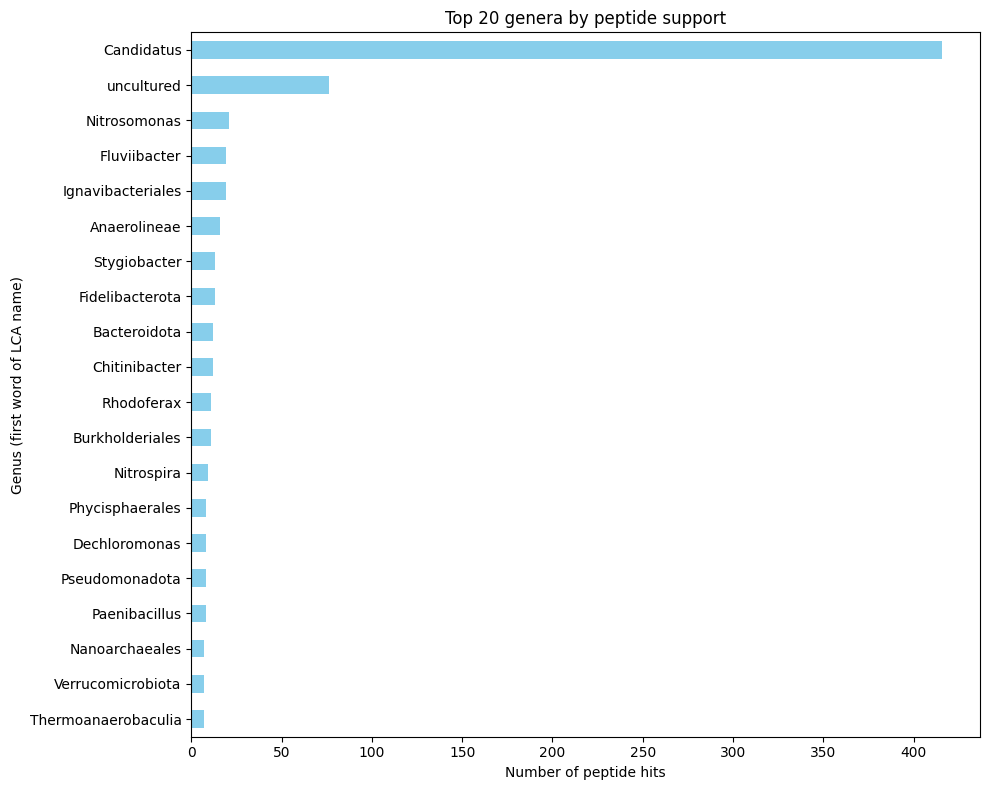


✅ Filtered dataset saved to: Diamond_alignments/diamond_df_lca_filtered_5_hits_by_genus.csv
📊 Unique taxa remaining: 116


In [44]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: Load the LCA-annotated DIAMOND results ===
file_path = "Diamond_alignments/diamond_df_with_lca_uniref100.csv"
df = pd.read_csv(file_path)

# === Step 2: Set peptide hit threshold ===
min_hits = 5  # Minimum peptide hits per genus (first word)

# === Step 3: Filter out NA values ===
df = df[df["lca_taxon_name"].notna() & (df["lca_taxon_name"] != "NA")].copy()

# === Step 4: Extract first word (e.g. genus or placeholder group) ===
df["lca_genus"] = df["lca_taxon_name"].str.split().str[0]

# === Step 5: Count hits per genus ===
genus_counts = df["lca_genus"].value_counts()

# Get list of genera with sufficient peptide support
confident_genera = genus_counts[genus_counts >= min_hits].index.tolist()

# Filter the DataFrame
filtered_df = df[df["lca_genus"].isin(confident_genera)].reset_index(drop=True)

# === Step 6: Visualize top 20 genera ===
plt.figure(figsize=(10, 8))
genus_counts.head(20).plot(kind="barh", color='skyblue')
plt.xlabel("Number of peptide hits")
plt.ylabel("Genus (first word of LCA name)")
plt.title("Top 20 genera by peptide support")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# === Step 7: Save filtered result ===
output_path = f"Diamond_alignments/diamond_df_lca_filtered_{min_hits}_hits_by_genus.csv"
filtered_df.to_csv(output_path, index=False)
print(f"\n✅ Filtered dataset saved to: {output_path}")
print(f"📊 Unique taxa remaining: {filtered_df['lca_taxon_name'].nunique()}")

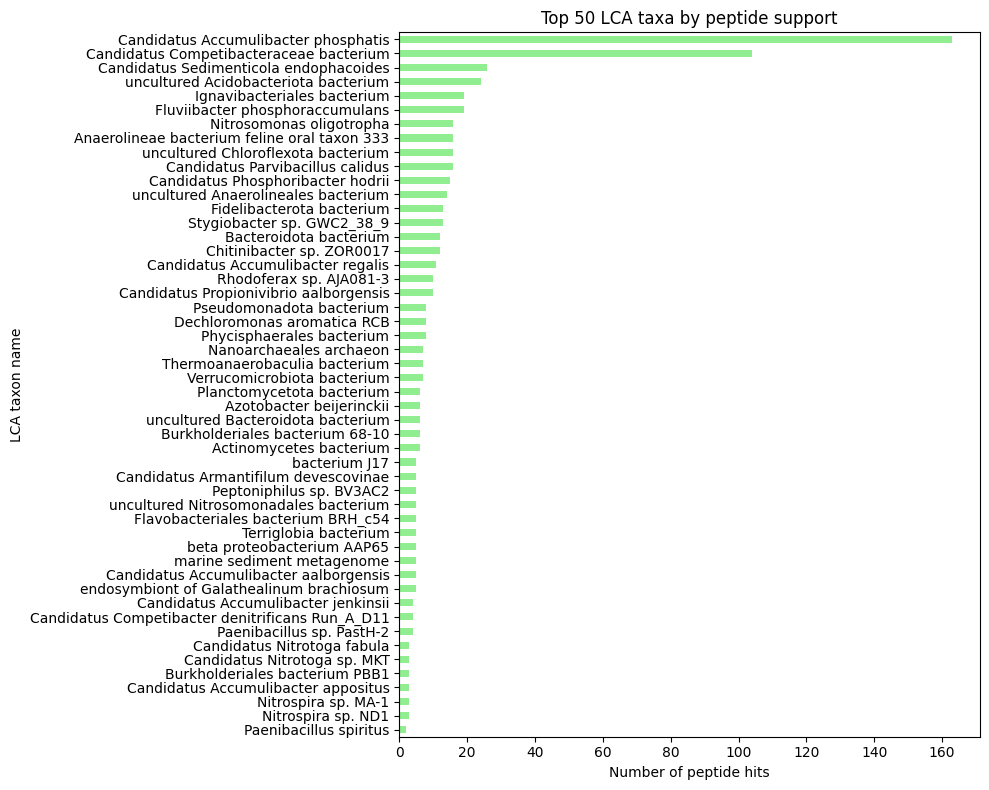

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load filtered LCA-based file ===
file_path = output_path
df = pd.read_csv(file_path)

# === Count full LCA taxon names ===
taxon_counts = df["lca_taxon_name"].value_counts()

# === Plot top 20 taxa ===
plt.figure(figsize=(10, 8))
taxon_counts.head(50).plot(kind="barh", color="lightgreen")
plt.xlabel("Number of peptide hits")
plt.ylabel("LCA taxon name")
plt.title("Top 50 LCA taxa by peptide support")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Visualizing Microbial Composition at desired rank Level

After completing the alignment of de novo peptide sequences with UniRef100 using DIAMOND, and mapping the matched accessions to their corresponding organism names and taxonomic ranks using UniProt and NCBI, we now assess the **composition of the microbial community** present in the sample.

This step visualizes the relative abundance of peptides associated with organisms at **strain** and **species** level. These insights help us:

- Validate taxonomic annotation quality
- Determine the diversity and dominance of microbial taxa
- Guide interpretation of functional annotations and database construction

### Key Features of This Visualization

- **Strain-level plot**: Shows only *classified strains* (excluding "Unclassified") to highlight specific strain annotations without overwhelming the figure.
- **Species-level plot**: Includes "Unclassified" to give a complete picture of annotation confidence.
- **Top-N labeling**: Only the top *N* most abundant taxa are individually labeled in the legend; the rest are grouped into a single **"Other"** category to enhance readability and reduce clutter.

This step gives a clear visual overview of how well peptides were taxonomically assigned and what organisms dominate the metaproteomic sample.


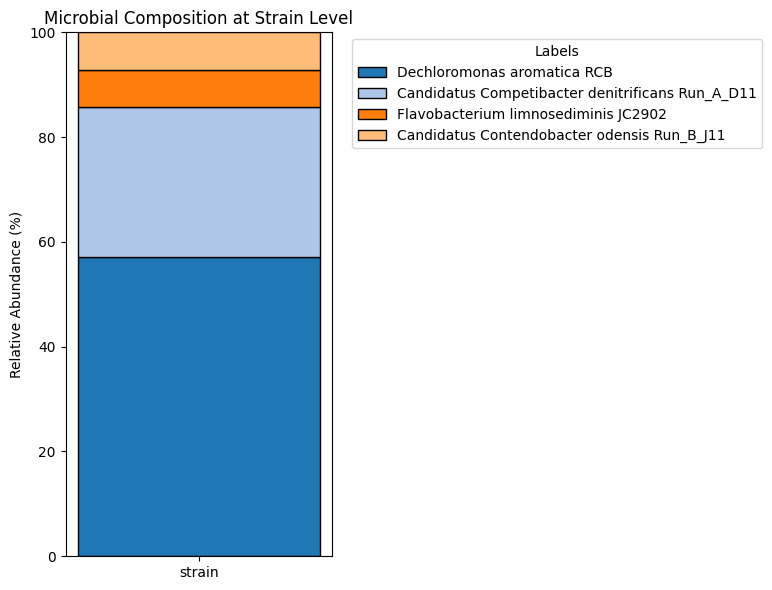

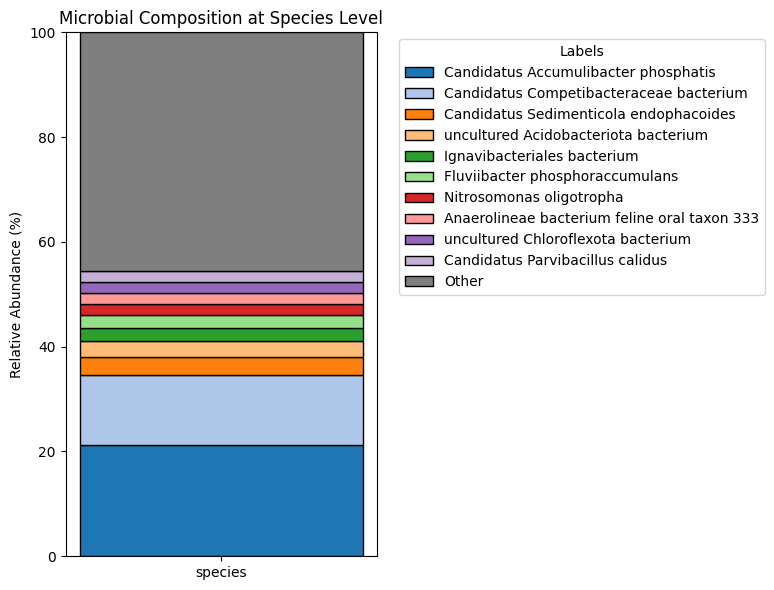

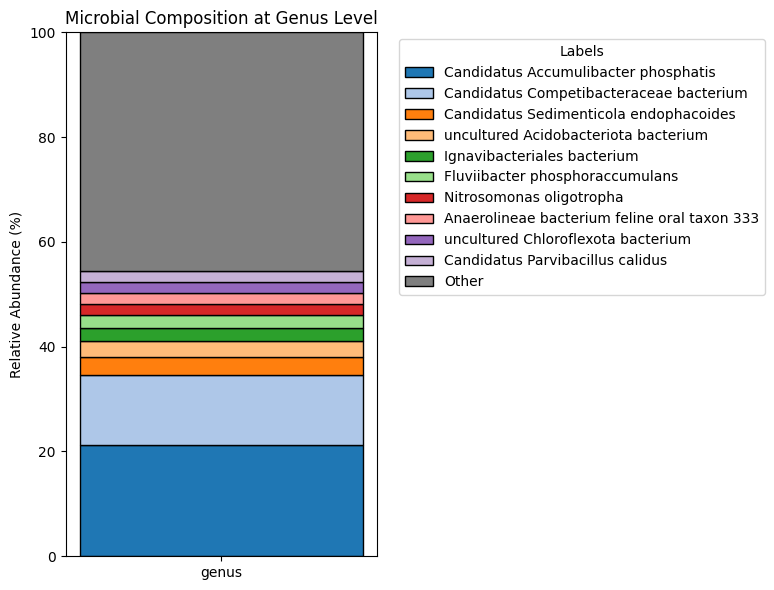

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load Data ===
df_path = output_path
df = pd.read_csv(df_path)

# === CONFIG ===
TOP_N = 10  # Number of most abundant taxa to label

def plot_composition(df, target_rank, top_n=10):
    df_copy = df.copy()

    if target_rank == "strain":
        df_copy = df_copy[df_copy["lca_rank"] == "strain"]
        df_copy = df_copy[df_copy["lca_taxon_name"].notna() & (df_copy["lca_taxon_name"] != "Unclassified")]
    else:
        df_copy["lca_taxon_name"] = df_copy["lca_taxon_name"].fillna("Unclassified").replace("NA", "Unclassified")

    # === Count peptide hits and compute relative abundance ===
    counts = df_copy["lca_taxon_name"].value_counts()
    total = counts.sum()
    proportions = (counts / total * 100).sort_values(ascending=False)

    top_labels = proportions.head(top_n)
    others = proportions.iloc[top_n:]
    if not others.empty:
        top_labels["Other"] = others.sum()

    label_order = list(top_labels.index)

    # === Coloring Strategy ===
    fixed_colors = {
        "Other": "#7f7f7f",  # light gray
        "Unclassified": "#000000"  # black
    }

    # Generate vivid colors for the rest
    dynamic_labels = [label for label in label_order if label not in fixed_colors]
    palette = sns.color_palette("tab20", len(dynamic_labels))
    dynamic_colors = dict(zip(dynamic_labels, palette))

    color_dict = {**dynamic_colors, **fixed_colors}
    ordered_colors = [color_dict[label] for label in label_order]

    # === Plot ===
    fig, ax = plt.subplots(figsize=(8, 6))

    bottom = 0
    for label, value, color in zip(label_order, top_labels.values, ordered_colors):
        ax.bar(target_rank, value, bottom=bottom, label=label, color=color, edgecolor="black")
        bottom += value

    ax.set_title(f"Microbial Composition at {target_rank.capitalize()} Level")
    ax.set_ylabel("Relative Abundance (%)")
    ax.set_ylim(0, 100)
    ax.legend(title="Labels", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# === Run ===
plot_composition(df, target_rank="strain", top_n=TOP_N)
plot_composition(df, target_rank="species", top_n=TOP_N)
plot_composition(df, target_rank="genus", top_n=TOP_N)


### Step 14: Fetch Proteomes for Organisms Using a Ranked Strategy

This cell initiates the *proteome-based strategy* to collect protein data for custom database creation. Instead of directly retrieving proteins from UniProtKB, this approach:
- Queries **whole proteomes** from UniProt based on the identified organisms.
- **Weights proteome downloads** by the number of peptide hits per organism (top 5 get more proteomes, lower-ranking ones get fewer).
- Ensures that high-confidence organisms are well-represented while maintaining a manageable dataset size.

This strategy allows the construction of a biologically realistic and computationally efficient protein database enriched with full proteomes of organisms most likely present in the sample.


In [ ]:
import pandas as pd
import os
import requests
from datetime import datetime
from tqdm import tqdm  # For progress bar

# === 1. Load Diamond alignment results and setup  output path ===

# Load previously annotated file (contains organism names and taxonomic ranks)
df = pd.read_csv(output_path)

# Create a timestamped output folder for this DIAMOND session
session_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
output_dir = f"Diamond_alignments/session_diamond_align_{session_time}"
os.makedirs(output_dir, exist_ok=True)

# Define path for output CSV file containing matched proteomes
proteome_csv_path = os.path.join(output_dir, "diamond_proteome_matches_all.csv")

# === 2. Proteome limits per organism ranking group ===

# More peptide hits = fetch more proteomes
limits = {
    "top_5": 100,         # Organisms ranked 1–5
    "rank_6_10": 50,      # Organisms ranked 6–10
    "rank_11_20": 30,     # Organisms ranked 11–20
    "rank_21_50": 10,      # Organisms ranked 21–50
    "rank_51_plus": 1     # All others
}

# === 3. Count peptide hits ===

# Count how often each organism appears (i.e., number of peptide hits)
organism_counts = df["lca_taxon_name"].value_counts()

# Create an ordered list of organisms based on abundance
ranked_organisms = organism_counts.index.tolist()

# Create a lookup: organism name → its assigned taxonomy rank
rank_lookup = df.drop_duplicates("lca_taxon_name").set_index("lca_taxon_name")["lca_rank"].to_dict()

# === 4. Plan how many proteomes to fetch per organism ===

fetch_plan = []
for i, org in enumerate(ranked_organisms):
    if i < 5:
        n = limits["top_5"]
    elif i < 10:
        n = limits["rank_6_10"]
    elif i < 20:
        n = limits["rank_11_20"]
    elif i < 50:
        n = limits["rank_21_50"]
    else:
        n = limits["rank_51_plus"]
    
    # Add to fetch plan: (ranking index, organism name, taxonomic rank, proteomes to fetch)
    fetch_plan.append((i + 1, org, rank_lookup.get(org, "unknown"), n))

# === 5. Function to fetch top proteomes for a given organism ===

def fetch_proteomes(organism, rank, n):
    """
    Queries UniProt's REST API to fetch up to `n` proteomes for a given organism.
    Prioritizes 'Reference' proteomes, then sorts by BUSCO completeness.
    """
    base_url = "https://rest.uniprot.org/proteomes/search"
    
    try:
        # Query UniProt API with organism name
        r = requests.get(base_url, params={"query": organism, "format": "json", "size": 500})
        r.raise_for_status()
        results = r.json().get("results", [])
    except Exception:
        return []  # On error or no results, return empty list

    # Prioritize reference proteomes first
    reference = [r for r in results if r.get("proteomeType") == "Reference"]
    if reference:
        results = reference + [r for r in results if r not in reference]

    # Sort by completeness using BUSCO scores
    results = sorted(results, key=lambda r: r.get("busco", {}).get("complete", 0), reverse=True)

    # Return top `n` proteomes (structured)
    return [
        (
            organism,
            r.get("id"),
            r.get("proteomeType"),
            r.get("taxonomy", {}).get("rank", "unknown"),
            "name"  # Placeholder; you can optionally include r.get("name")
        )
        for r in results[:n]
    ]

# === 6. Run fetch plan and collect results ===

results = []      # Holds all proteomes fetched
not_found = []    # Track organisms for which no proteomes were found

print("\nFetching proteomes based on rank...")

# Iterate through fetch plan and retrieve proteomes
for rank_idx, org, taxrank, limit in tqdm(fetch_plan):
    hits = fetch_proteomes(org, taxrank, limit)
    if hits:
        results.extend(hits)
    else:
        not_found.append(org)

# === 7. Save matched proteomes to CSV ===

df_out = pd.DataFrame(results, columns=["Organism", "Proteome ID", "Proteome Type", "Tax Rank", "Used Query"])
df_out.to_csv(proteome_csv_path, index=False)

# === 8. Summary logging ===

print("\n=== SUMMARY ===")
print(f"Proteomes matched for {len(set([r[0] for r in results]))} / {len(ranked_organisms)} organisms")
print(f"No proteomes found for: {len(not_found)}")
print(f"Output saved to: {proteome_csv_path}")


### Step 15: Download and Merge Protein FASTA Files from Matched Proteomes

After selecting organisms based on DIAMOND peptide hits and fetching their matching UniProt proteomes, this cell automates the download of **protein sequences** from each matched proteome.

Key features:
- Uses UniProt’s `/uniprotkb/stream` API to fetch FASTA data.
- Parallelizes requests using `ThreadPoolExecutor` to accelerate download.
- Collects and merges all results into a single multi-entry FASTA file.
- Skips failed downloads and prints a list of any failed proteomes.

This final merged FASTA file will be used to construct a custom database for downstream taxonomic or functional annotation.


In [ ]:
import os
import pandas as pd
import requests
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed

# === 1. Config ===

# Directory where previous proteome matching results were saved
output_dir = os.path.dirname(proteome_csv_path)

# Output path for the combined FASTA containing all downloaded proteins
output_fasta = os.path.join(output_dir, "diamond_proteins_from_proteomes.fasta")

# Determine a reasonable number of threads to use (does not overload CPU because downloads are I/O-bound)
num_threads = os.cpu_count()

# === 2. Load proteome IDs ===

# Read CSV file created from matched proteomes
df = pd.read_csv(proteome_csv_path)

# Extract unique proteome IDs (to avoid redundant downloads)
proteome_ids = df["Proteome ID"].dropna().unique()

# === 3. Define the FASTA download function ===

def fetch_fasta(proteome_id):
    """
    Fetches all protein sequences in FASTA format from a given UniProt proteome ID.
    Returns (proteome_id, fasta_content) on success, (proteome_id, None) on failure.
    """
    url = f"https://rest.uniprot.org/uniprotkb/stream?query=proteome:{proteome_id}&format=fasta"
    try:
        response = requests.get(url, timeout=60)
        if response.ok:
            return proteome_id, response.text.strip()
    except:
        pass
    return proteome_id, None

# === 4. Parallel downloading of proteomes ===

all_entries = []      # To store all downloaded protein FASTA entries
failed_ids = []       # To track proteomes that could not be downloaded

print(f"\nDownloading {len(proteome_ids)} proteomes using {num_threads} threads...\n")

# Use ThreadPoolExecutor to parallelize requests for better performance
with ThreadPoolExecutor(max_workers=num_threads) as executor:
    # Submit all proteome download tasks at once
    futures = {executor.submit(fetch_fasta, pid): pid for pid in proteome_ids}

    # Process results as they complete
    for future in tqdm(as_completed(futures), total=len(futures)):
        pid, result = future.result()
        if result:
            # Split result into FASTA entries (entries start with ">")
            entries = result.split("\n>")
            for entry in entries:
                # Ensure proper formatting (each entry must start with ">")
                if not entry.startswith(">"):
                    entry = ">" + entry
                all_entries.append(entry)
        else:
            failed_ids.append(pid)

# === 5. Write all protein sequences to one combined FASTA file ===

with open(output_fasta, "w") as f_out:
    f_out.write("\n".join(all_entries))

# === 6. Summary output ===

print("\nDownload complete.")
print(f"Total protein sequences written: {len(all_entries)}")
print(f"Output FASTA saved to:\n{output_fasta}")

if failed_ids:
    print(f"{len(failed_ids)} proteomes failed to download.")
    print("Failed Proteome IDs:", failed_ids)
